In [82]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def inverse_fourier_transform(image):
    """
    对输入图像进行傅立叶逆变换。

    参数:
    image -- 输入的复数频域图像

    返回:
    output -- 逆变换后的图像
    """
    # 进行傅立叶逆变换
    output = np.fft.ifft2(np.fft.ifftshift(image))
    # 获取实部并返回
    return np.abs(output*100)

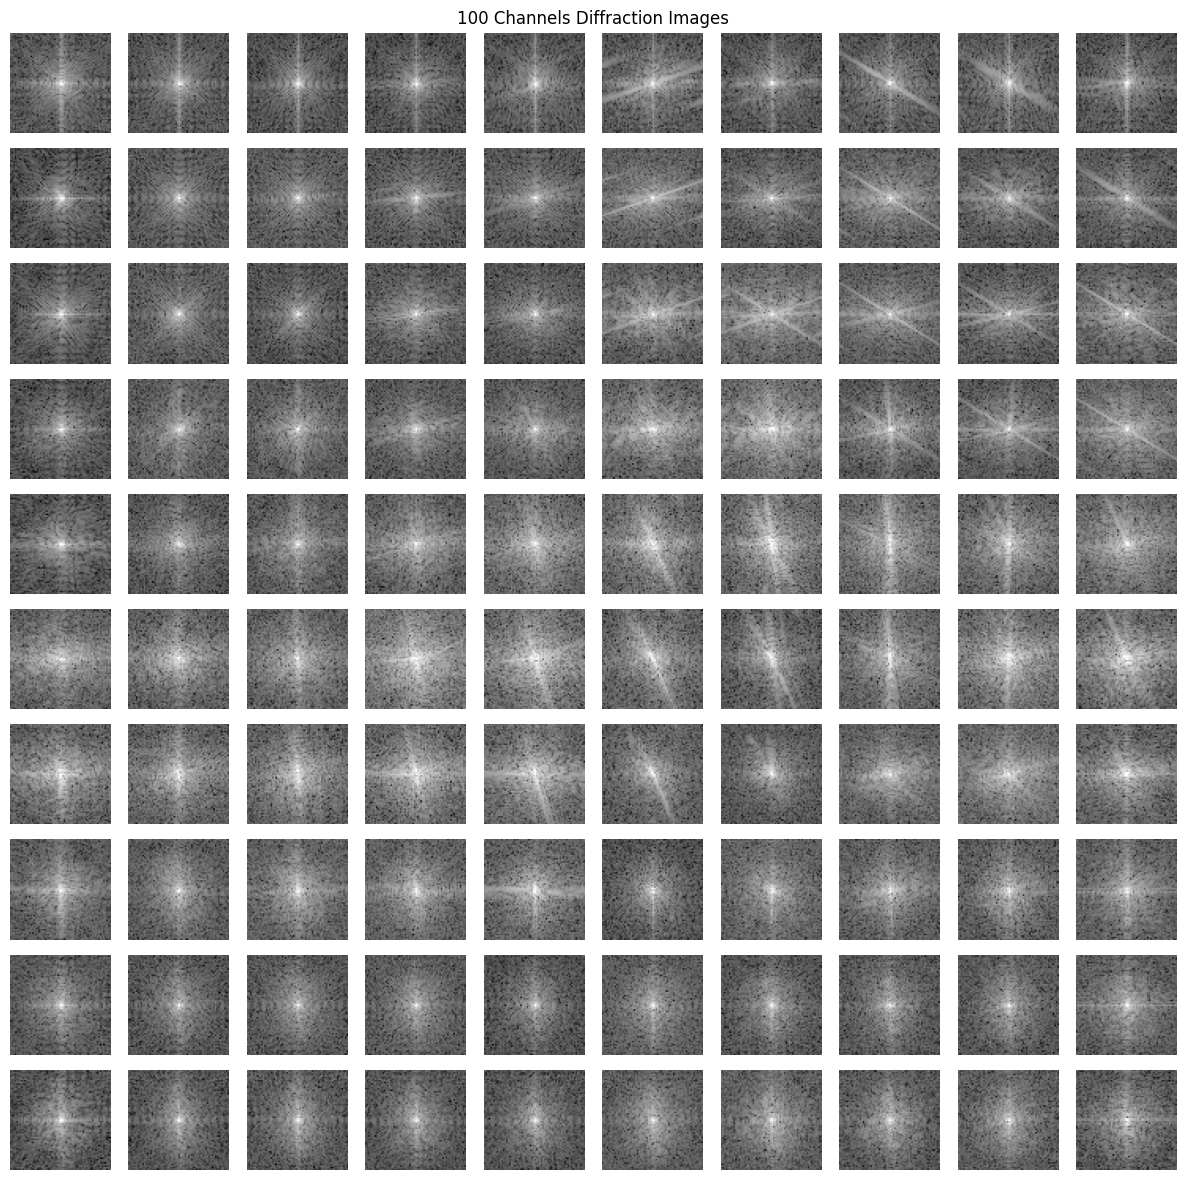

In [83]:
# 加载保存的 diffset
diffset = np.load('/Users/panding/workspace/PtychoDM/AM_airplane256_PH_boat256.npy')

# 确保 diffset 中有 100 个通道
assert diffset.shape[0] == 100, "diffset 必须包含 100 个通道"

# 设置 10x10 图像布局
fig, axes = plt.subplots(10, 10, figsize=(12, 12))  # 创建 10x10 子图
fig.suptitle('100 Channels Diffraction Images')

# 遍历每个子图并显示图像
for i in range(10):
    for j in range(10):
        index = i * 10 + j  # 计算每个通道的索引
        axes[i, j].imshow(np.log10(np.abs(diffset[index]) + 0.1), cmap='gray')  # 显示第 index 个通道的图像
        axes[i, j].axis('off')  # 关闭坐标轴

plt.tight_layout()
plt.show()

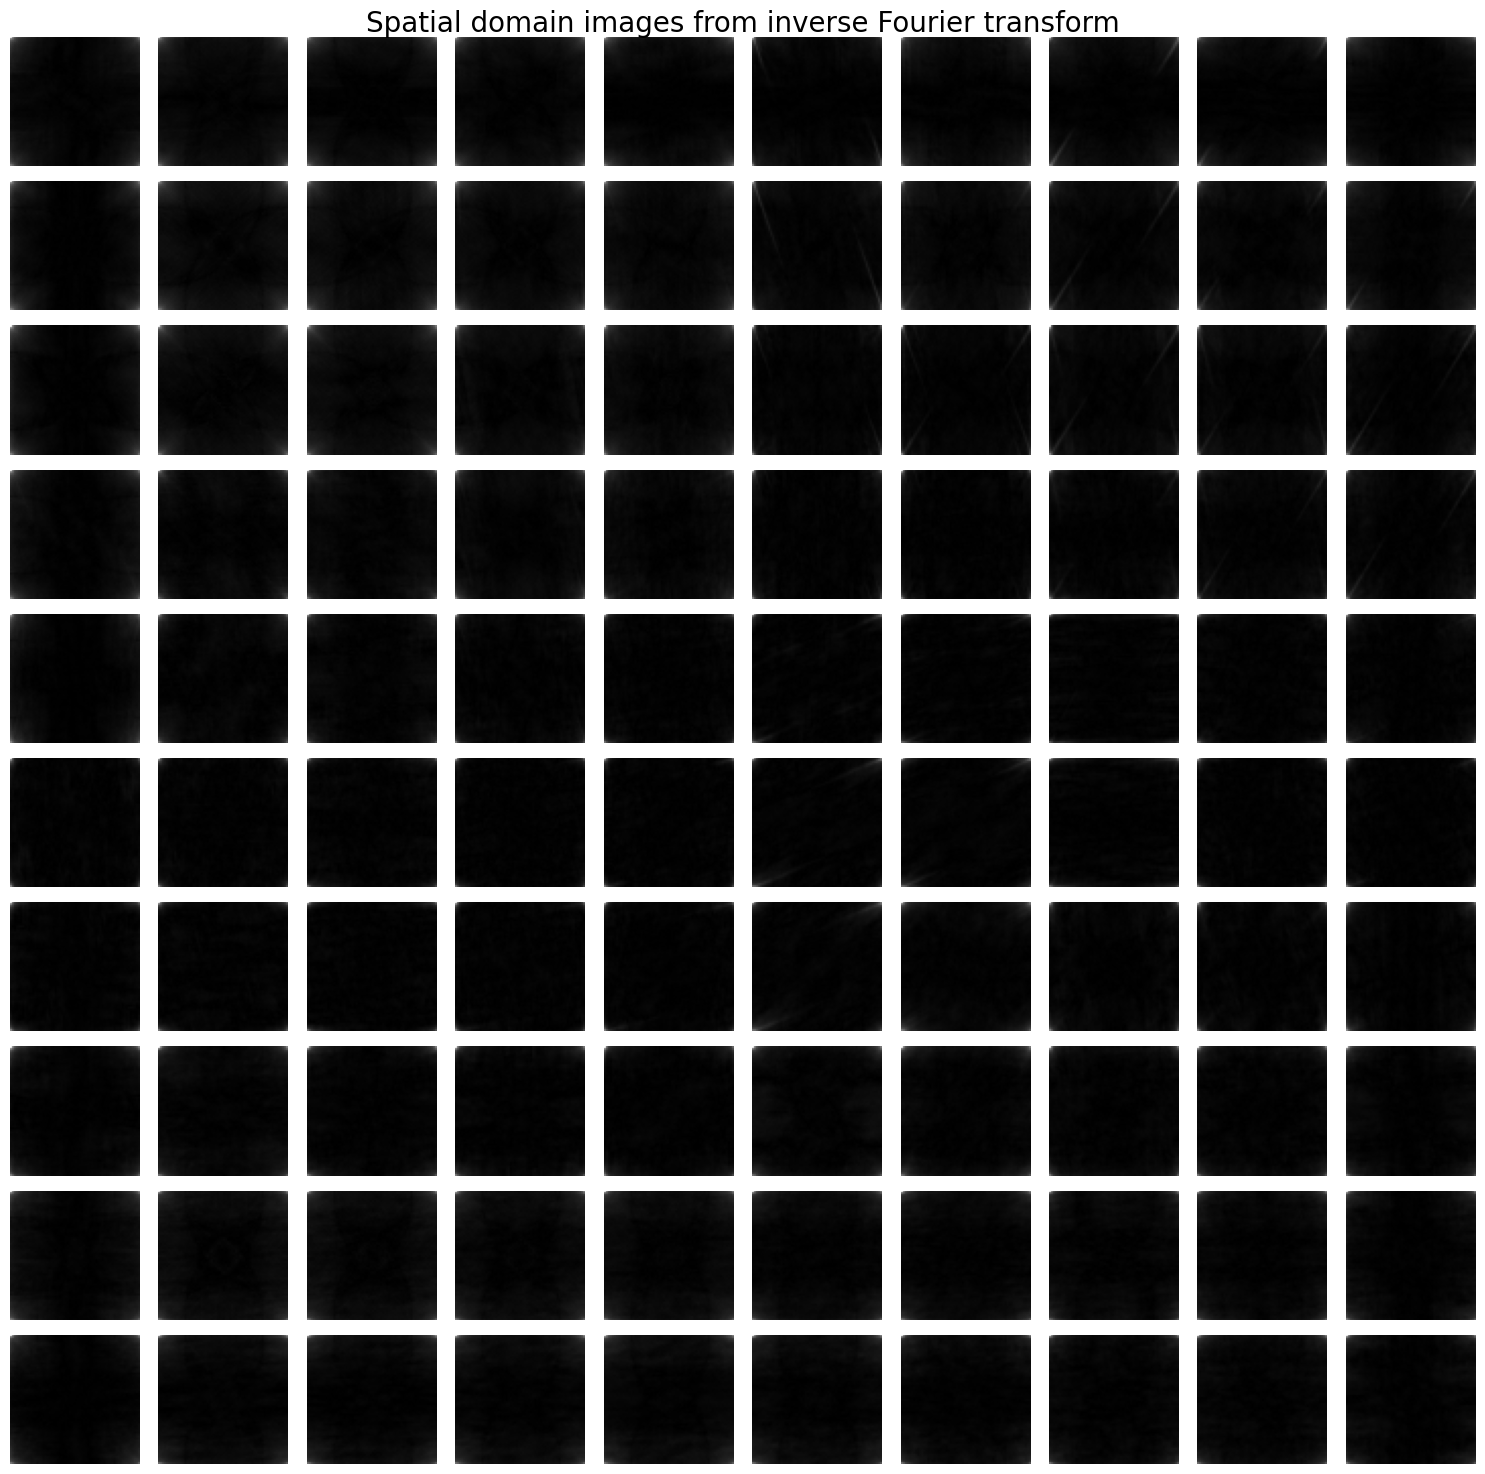

In [84]:
# 计算逆傅立叶变换并存储空域图像
spatial_images = []
for i in range(len(diffset)):
    # 对每个通道的频域图像进行逆傅立叶变换
    spatial_image = np.fft.ifft2(np.fft.fftshift(diffset[i]))

    # 取复数结果的绝对值，得到强度图像
    spatial_image = np.abs(spatial_image)
    spatial_images.append(spatial_image)

# 将结果可视化为 10x10 的网格
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.ravel()

for i in range(100):
    # 可视化每一个空域图像
    axes[i].imshow(spatial_images[i], cmap='gray')
    axes[i].axis('off')

plt.suptitle('Spatial domain images from inverse Fourier transform', fontsize=20)
plt.tight_layout()
plt.show()